# PENGUIN DATASET ANALYSIS

# Dataset Information:

- This dataset is based on the information about three species of penguins('Adelie','Gentoo','Chinstrap') and various characteristics including their bill_length,bill_depth,flipper_length,body_mass and sex.
- The classification goal is to predict the species of penguins based on certain feature.

Source:
- please check the description at: [Dataset Link](http://localhost:8888/edit/penguin%20dataset.csv)

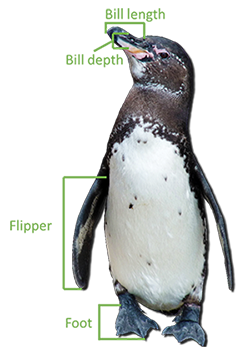

Feature Information:
- species: penguin species ( Adélie, Gentoo, Chinstrap)
- island: island name (Biscoe, Dream, Torgersen) in the Palmer Archipelago (Antarctica)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)                                                                                          - body_mass_g: body mass (g)
- Sex: penguin sex(male,female)





Bill:

The upper margin of the beak is referred to as the bill and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull.

# Loading the Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn and then import the dataset and save it in a dataframe "penguin_raw".

In [113]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# loading the dataset
penguin_raw = pd.read_csv('penguin dataset.csv')
# copy the DataFrame 'Penguin_raw' and save it into "penguin"
penguin = penguin_raw.copy()

In [115]:
# to change the directory
import os
#os.getcwd()
os.chdir('C:\\Users\\Piya\\Desktop\\Python')

In [116]:
penguin.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [117]:
penguin.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [118]:
penguin.shape

(344, 9)

# Basic EDA:
Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.

In [119]:
# getting the column names
penguin.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [120]:
# dropping the column "rowid"
penguin = penguin.drop(['rowid'], axis=1)

In [121]:
# check the data types
penguin.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [122]:
# renaming columns
penguin = penguin.rename(columns = {'species':'Species','island':'Island', 
                         'bill_length_mm':'Bill_Length', 'bill_depth_mm':'Bill_Depth','flipper_length_mm':'Flipper_Length','body_mass_g':'Body_Mass','sex':'Sex','year':'Year'})

# Checking for Missing values:
isnull() returns True if the cell contains a missing value and False otherwise. However, since the dataset is large, it is impractical for us to manually check all True, False values. Therefore, we will try to get a summary of the missing values in the dataset as follows.

In [123]:
penguin.isnull()

,Species,Island,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass,Sex,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [124]:
penguin.isnull().sum()

Species            0
Island             0
Bill_Length        2
Bill_Depth         2
Flipper_Length     2
Body_Mass          2
Sex               11
Year               0
dtype: int64

In [125]:
#Checking for the percentage of the missing data

#creating a dataframe for percentage of missing data
percentage_of_missing_data = pd.DataFrame({'Percentage of Missing of Data':round((penguin.isnull().sum()/len(penguin.index)) * 100,3)}) 
percentage_of_missing_data = percentage_of_missing_data.sort_values(by='Percentage of Missing of Data',ascending=False)
percentage_of_missing_data

,Percentage of Missing of Data
Sex,3.198
Bill_Length,0.581
Bill_Depth,0.581
Flipper_Length,0.581
Body_Mass,0.581
Species,0.000
Island,0.000
Year,0.000


<Axes: >

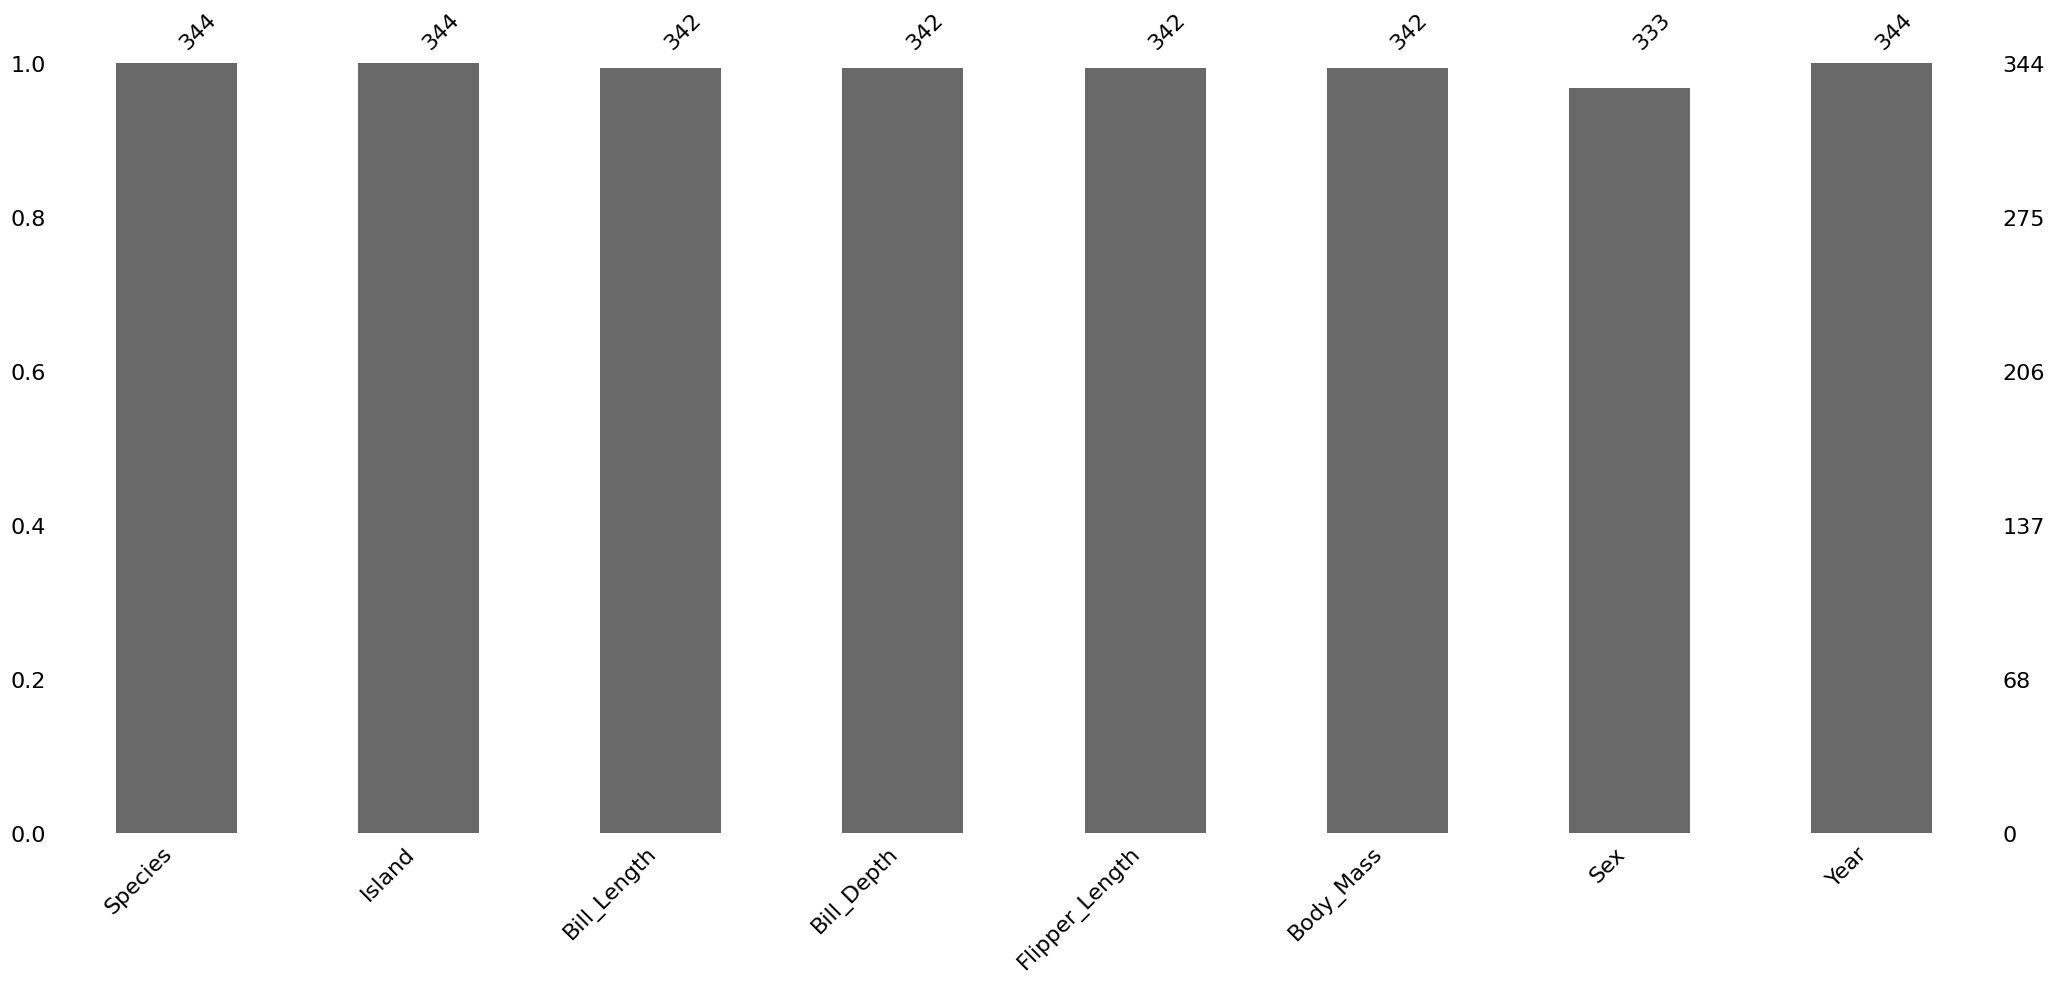

In [126]:
# visualizing the missing values using missingno library
import missingno as msno
# creating bar plot to see the missing values
msno.bar(penguin)

- There are missing values in multiple columns.

In [127]:
penguin[penguin.isnull().any(axis=1)]

,Species,Island,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass,Sex,Year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


- Since at 3rd and 271 rows, all the important values are missing.So we will drop the entire row.
- There are less number of missing values in 'Sex' column, but we will impute them by mode of the column.

In [128]:
# dropping the 3rd and 271th row.
penguin.drop([3,271],axis=0,inplace=True)

In [129]:
# finding the mode of the column 'Sex'
penguin['Sex'].mode()

0    male
Name: Sex, dtype: object

In [130]:
# Imputing NaN values of column 'Sex' with its mode 'male'
df=penguin.fillna('male')

In [131]:
df.isnull().sum()

Species           0
Island            0
Bill_Length       0
Bill_Depth        0
Flipper_Length    0
Body_Mass         0
Sex               0
Year              0
dtype: int64

In [132]:
df.shape

(342, 8)

In [133]:
# dropping the duplicate values
df.drop_duplicates()

,Species,Island,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass,Sex,Year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


- Dealing with missing values is done now.

In [134]:
df.reset_index(drop=True)

,Species,Island,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass,Sex,Year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         342 non-null    object 
 1   Island          342 non-null    object 
 2   Bill_Length     342 non-null    float64
 3   Bill_Depth      342 non-null    float64
 4   Flipper_Length  342 non-null    float64
 5   Body_Mass       342 non-null    float64
 6   Sex             342 non-null    object 
 7   Year            342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


In [136]:
# finding the number of unique in each column
df.nunique()

Species             3
Island              3
Bill_Length       164
Bill_Depth         80
Flipper_Length     55
Body_Mass          94
Sex                 2
Year                3
dtype: int64

In [137]:
# statistical summary of data
penguin.describe(include = 'all')

,Species,Island,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass,Sex,Year
count,342,342,342.000000,342.000000,342.000000,342.000000,333,342.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,151,167,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029240
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.817168
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


# Feature Analysis and Data Visualization:

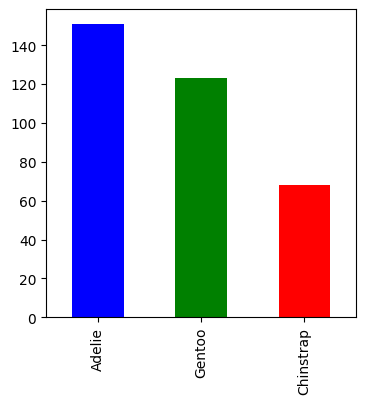

In [138]:
# The number of Species
df.Species.value_counts().plot(kind='bar',figsize=[4,4],color=['b','g','r'])
plt.show()

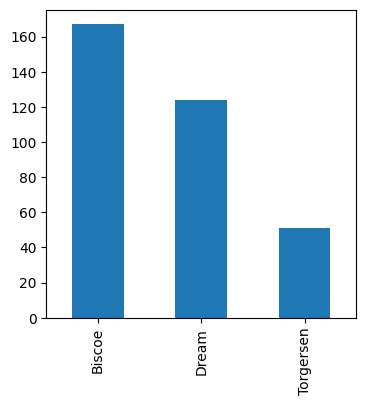

In [139]:
# The number of islands
df.Island.value_counts().plot(kind='bar',figsize=[4,4])
plt.show()

- More number of penguins are in 'Biscoe' island.

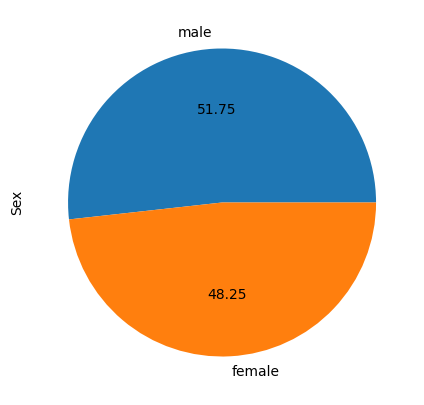

In [140]:
# The number of penguins in each gender
df.Sex.value_counts().plot(kind='pie',figsize=[5,5],autopct='%.2f')
plt.show()

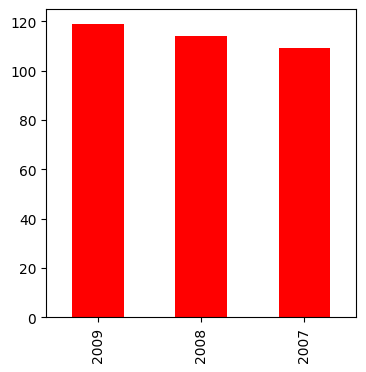

In [141]:
# The number of years
df.Year.value_counts().plot(kind='bar',figsize=[4,4],color="red")
plt.show()

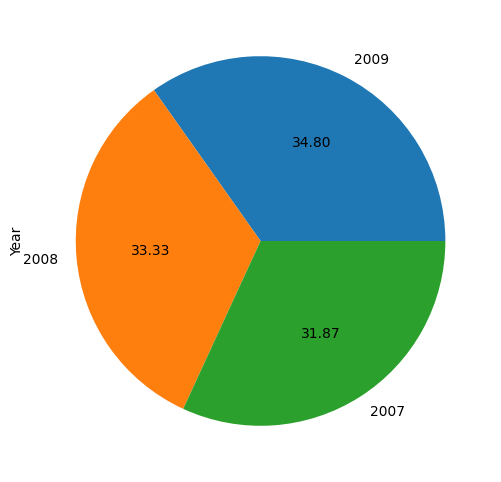

In [142]:
# The total number of penguins per year
df.Year.value_counts().plot(kind='pie',figsize=[6,6],autopct='%.2f')
plt.show()

- The number of penguins has increased from the year 2007 to 2009.

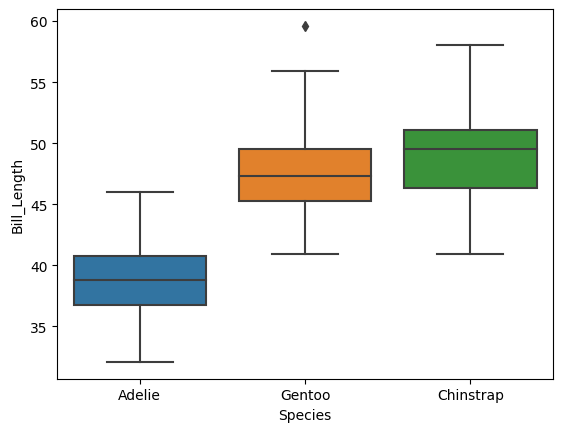

In [143]:
# Distribution of Bill_Length
sns.boxplot(data=df, x="Species", y="Bill_Length")
plt.show()

- There are a very few outliers which are not extreme.So we will not remove them.

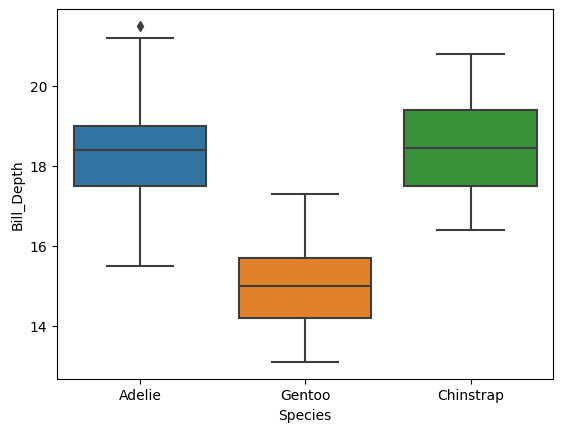

In [144]:
# Distribution of Bill_Depth 
sns.boxplot(data=df,x="Species",y="Bill_Depth")
plt.show()

- There are a very few outliers which are not extreme.So we will not remove them.

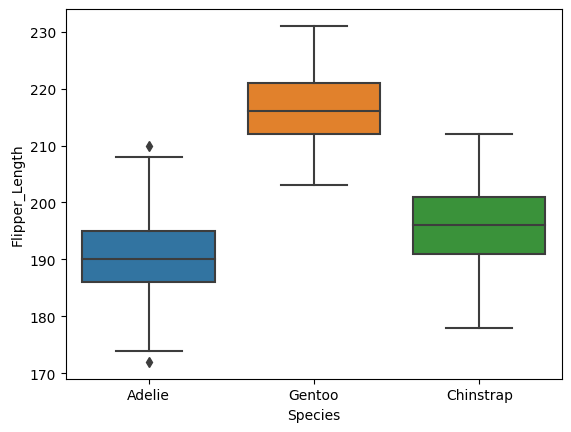

In [145]:
# Distribution of Flipper_Length
sns.boxplot(df,x="Species",y="Flipper_Length")
plt.show()


- There are a very few outliers which are not extreme.So we will not remove them.

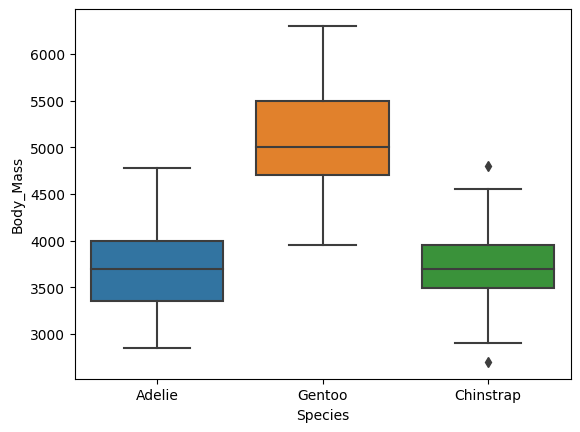

In [146]:
# Distribution of Body_Mass
sns.boxplot(df,x="Species",y="Body_Mass")
plt.show()

- There are a very few outliers which are not extreme.So we will not remove them.

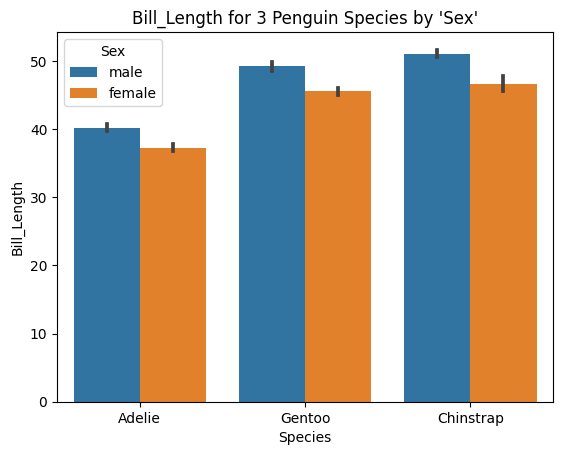

In [147]:
# The species having highest Bill_Length

sns.barplot(data=df,x="Species",y="Bill_Length",hue="Sex")
plt.title("Bill_Length for 3 Penguin Species by 'Sex'",size=12)
plt.show()

- We can see that the Bill_Length of penguins are more in Males than Female. 
- 'Chinstrap' penguins have maximum Bill_Length.

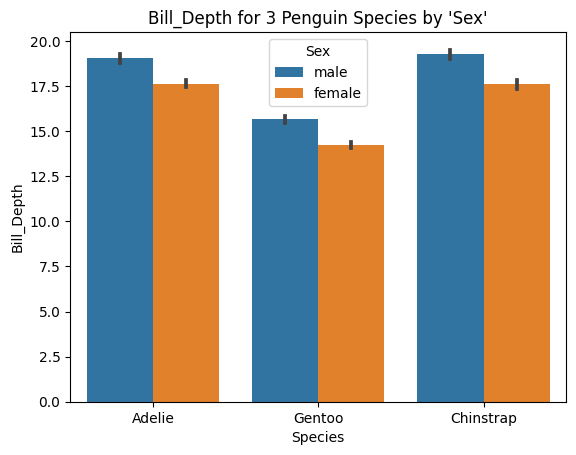

In [148]:
# The species having highest Bill_Depth

sns.barplot(data=df,x="Species",y="Bill_Depth",hue="Sex")
plt.title("Bill_Depth for 3 Penguin Species by 'Sex'",size=12)
plt.show()

- Bill_Depth of male penguins are more as compared to female penguins.
- 'Adelie' and 'Chinstrap' penguins have deeper Bill_Depth than 'Gentoo'.

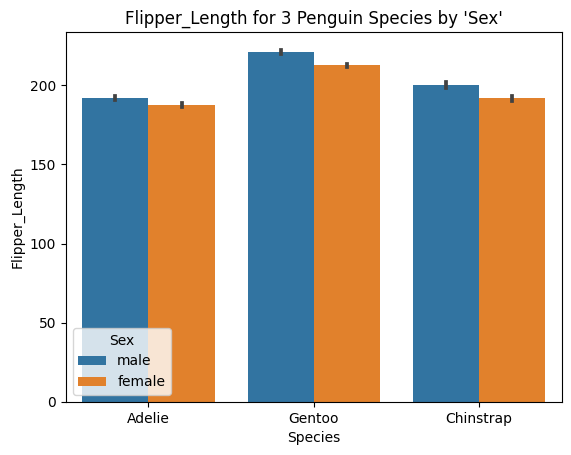

In [149]:
# The species having highest Flipper_Length

sns.barplot(data=df,x="Species",y="Flipper_Length",hue="Sex")
plt.title("Flipper_Length for 3 Penguin Species by 'Sex'",size=12)
plt.show()

- Clearly, we can observe that male penguins have longer filler than female.
- 'Gentoo' penguins have longesst Flipper_Length than other two species.

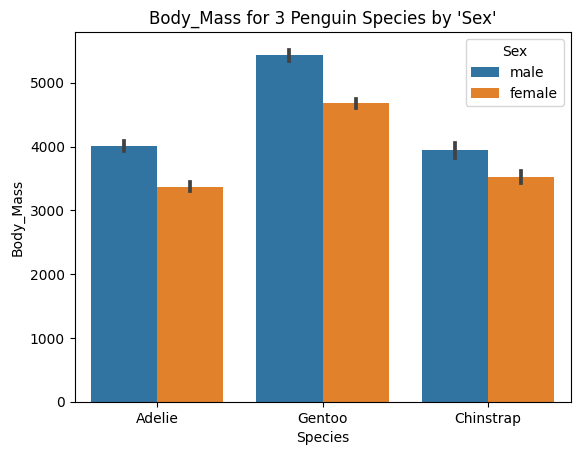

In [150]:
# The species having highest Body_Mass

sns.barplot(data=df,x="Species",y="Body_Mass",hue="Sex")
plt.title("Body_Mass for 3 Penguin Species by 'Sex'",size=12)
plt.show()

- The Body_Mass of 'Gentoo' penguins are more than other two species.
- Even the female 'Gentoo' have higher Body_Mass as compared to male penguins of other two species.

In [151]:
# The number of penguins in each Species in each island

df1= df[['Island','Species']].groupby('Island').value_counts()
print(df1)   # dataframe having Island and species and their count

Island     Species  
Biscoe     Gentoo       123
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        51
dtype: int64


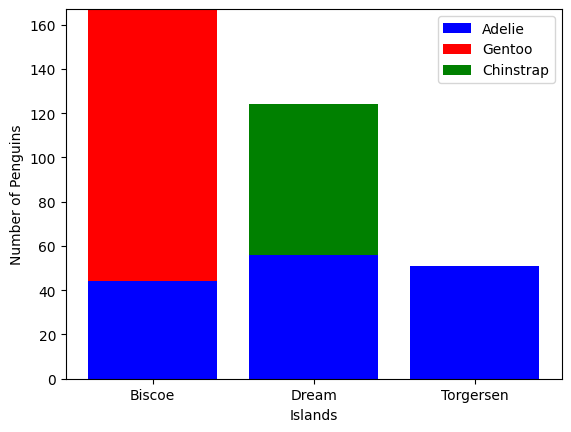

In [152]:
x = [i for i in df['Island'].sort_values().unique()]   # List of Islands

y1= np.array([44,56,51])     # List of "Adelie" penguins in 'Biscoe'',Dream','Torgersen'
y2= np.array([123,0,0])      # List of "Gentoo" penguins in 'Biscoe','Dream','Torgersen'
y3= np.array([0,68,0])       # List of "Chinstrap" penguins in 'Biscoe','Dream','Torgersen'

plt.bar(x,y1,color='b')
plt.bar(x,y2,bottom=y1,color='r')
plt.bar(x,y3,bottom=y1+y2,color='g')
plt.xlabel("Islands")
plt.ylabel("Number of Penguins")
plt.legend(["Adelie","Gentoo","Chinstrap"])
plt.show()

- 'Adelie' penguins are present in all islands.
- 'Gentoo' penguins are present in 'Biscoe' island only.
- 'Chinstrap' penguins are present in 'Dream' island only.
- 'Torgersen' island has 'Adelie' penguins.

In [153]:
# The number of penguins in each Species in each year

df2= df[['Year','Species']].groupby('Year').value_counts()
print(df2)   # dataframe having year and species and their count

Year  Species  
2007  Adelie       49
      Gentoo       34
      Chinstrap    26
2008  Adelie       50
      Gentoo       46
      Chinstrap    18
2009  Adelie       52
      Gentoo       43
      Chinstrap    24
dtype: int64


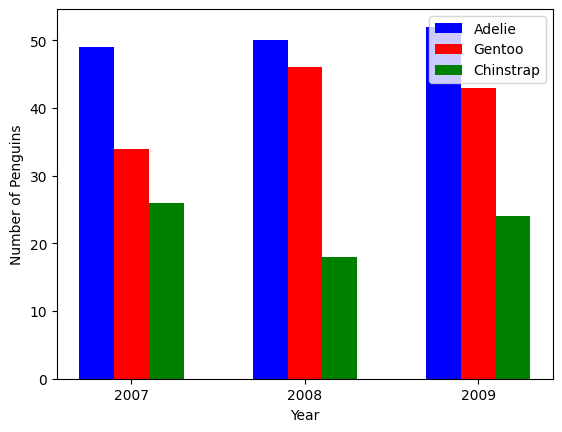

In [154]:
x= [i for i in df['Year'].sort_values().unique()]   # List of years
x1= np.arange(3)
y1= np.array([49, 50, 52])        # List of 'Adelie' penguins in 2007,2008,2009
y2= np.array([34, 46, 43])     # List of 'Gentoo' penguins in 2007,2008,2009
y3= np.array([26, 18, 24])  # List of 'Chinstrap' penguins in 2007,2008,2009

plt.bar(x1-0.2,y1,color='b',width=0.2)
plt.bar(x1,y2,color='r',width=0.2)
plt.bar(x1+0.2,y3,color='g',width=0.2)
plt.xticks(x1,x)
plt.xlabel("Year")
plt.ylabel("Number of Penguins")
plt.legend(["Adelie","Gentoo","Chinstrap"])
plt.show()

- The number of 'Adelie' penguins has increased from the year 2007 to 2009.
- The number of 'Gentoo' penguins was maximun in the year 2008.
- The number of 'Chinstrap' penguins were lowest in the year 2008 and highest in the year 2007.

In [155]:
# finding the average Body_Mass for each Species.

Species_grp=df.groupby("Species")
Species_avg_mass=Species_grp["Body_Mass"].mean()
print(round(Species_avg_mass,2))

Species
Adelie       3700.66
Chinstrap    3733.09
Gentoo       5076.02
Name: Body_Mass, dtype: float64


In [156]:
# Relation between Bill_Length & Body_Mass

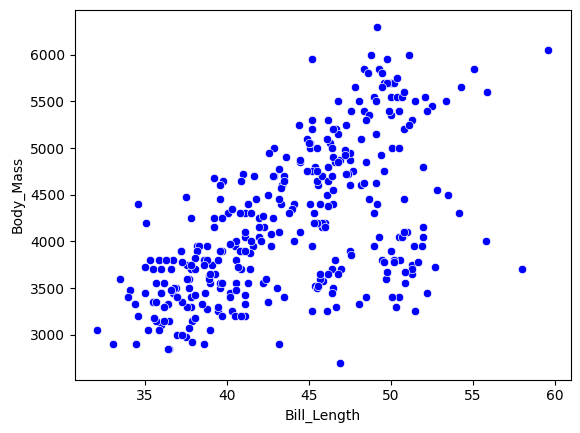

In [157]:
sns.scatterplot(data=df, x= 'Bill_Length',y='Body_Mass',color='b')
plt.show()

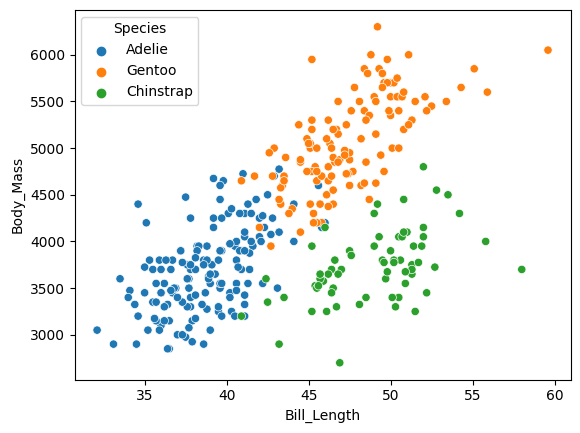

In [158]:
sns.scatterplot(data=df, x= 'Bill_Length',y='Body_Mass',color='g',hue='Species')
plt.show()

- In some penguins the Body_Mass and Bill_Length are directly propertional to each other.
- If Bill_Length > 44mm & Body_Mass < 4000gm then penguin belongs to 'Chinstrap' Species.
- If Bill_Length < 44mm & Body_Mass < 4000gm then penguin belongs to 'Adelie' Species.
- If Bill_Length > 44mm & Body_Mass > 4000gm then penguin belongs to 'Gentoo' Species.

In [159]:
# Relation between Flipper_Length & Body_Mass

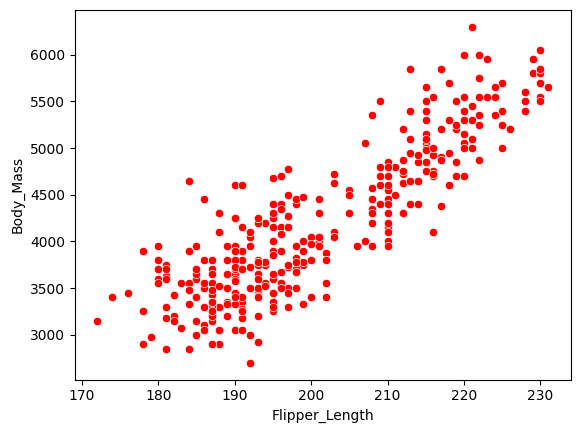

In [160]:
sns.scatterplot(data=df, x= 'Flipper_Length',y='Body_Mass',color='r')
plt.show()

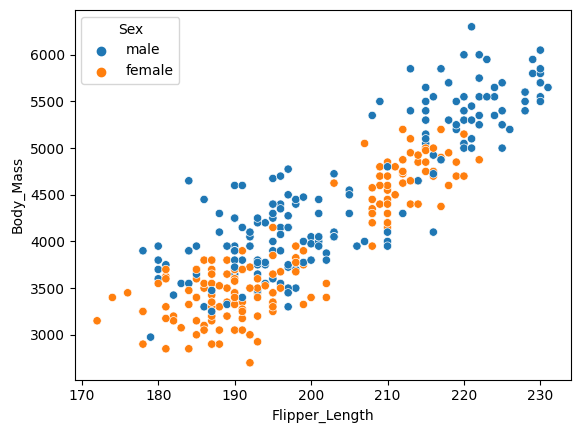

In [161]:
sns.scatterplot(data=df, x= 'Flipper_Length',y='Body_Mass',hue='Sex')
plt.show()

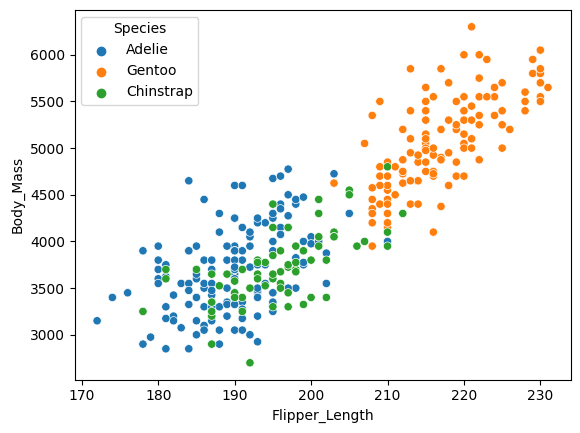

In [162]:
sns.scatterplot(data=df, x= 'Flipper_Length',y='Body_Mass',hue='Species')
plt.show()

- The Body_Mass and Flipper_Length are directly propertional to each other.
- The Male penguins specially from 'Gentoo' Species have higher Flipper_Length.
- If Flipper_Length > 208mm & Body_Mass > 4000gm then penguins belongs to 'Gentoo' Species.

In [163]:
# Relation between Bill_Length & Bill_depth

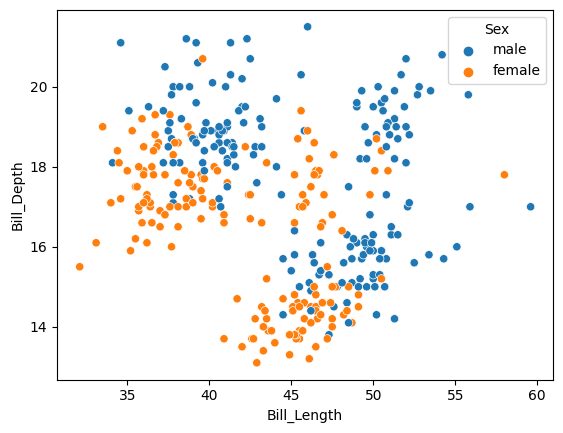

In [164]:
sns.scatterplot(data=df, x= 'Bill_Length',y='Bill_Depth',hue='Sex')
plt.show()

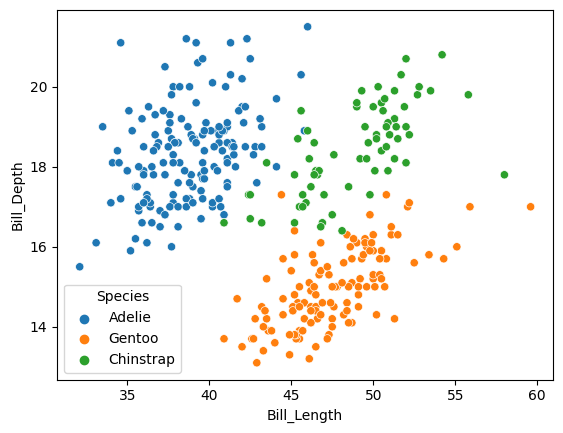

In [165]:
sns.scatterplot(data=df, x= 'Bill_Length',y='Bill_Depth',hue='Species')
plt.show()

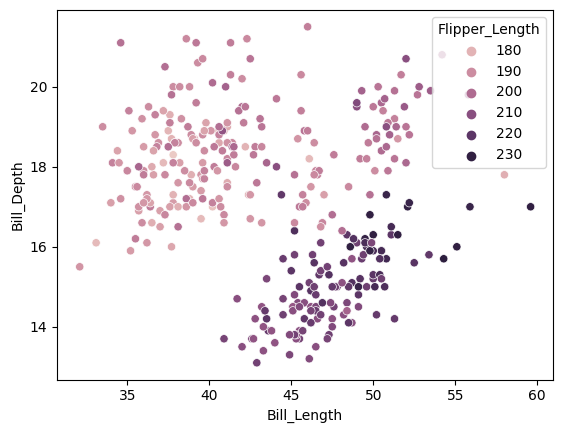

In [166]:
sns.scatterplot(data=df, x= 'Bill_Length',y='Bill_Depth',hue='Flipper_Length')
plt.show()

- Male Penguins have higher Bill_Length and Bill_Depth as compared to Female penguins.
- Bill_Length and Bill_Depth are different for different Species.
- Penguins having Flipper_Length greater than 220 have low Bill_Depth.
- If Bill_Length > 40mm & Bill_Depth < 16.2mm then penguin belongs to 'Gentoo' Species.
- If Bill_Length > 40mm & Bill_Depth > 16.2mm then penguin belongs to 'Chinstrap' Species. 
- If Bill_Length < 40mm & Bill_Depth > 16.2mm then penguin belongs to 'Adelie' Species.

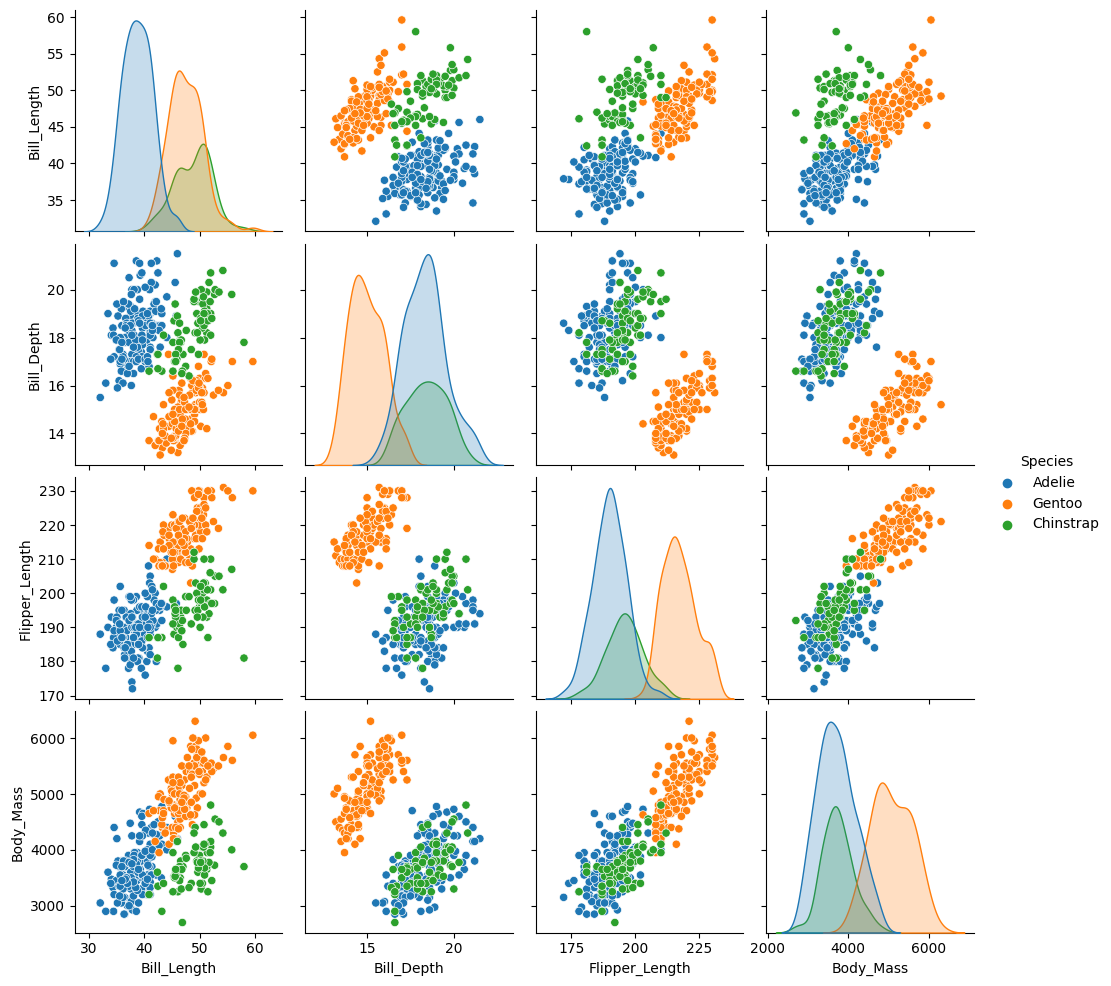

In [167]:
# Pair plots of Bill_Length , Bill_Depth , Flipper_Length , Body_Mass

sns.pairplot(data=df[['Bill_Length','Bill_Depth','Flipper_Length','Body_Mass','Species']], hue='Species')
plt.show()

- Clearly, We can see that Bill_Length is an important parameter to distinguish the Species.
- On the basis of relation between Bill_Length & Bill_Depth or Bill_Length & Flipper_Length or Bill_Length & Body_Mass ,We can    differentiate the penguins.

In [168]:
# finding the correlation coefficient between the continuous numerical variables
df[['Bill_Length','Bill_Depth','Flipper_Length','Body_Mass']].corr()

,Bill_Length,Bill_Depth,Flipper_Length,Body_Mass
Bill_Length,1.000000,-0.235053,0.656181,0.595110
Bill_Depth,-0.235053,1.000000,-0.583851,-0.471916
Flipper_Length,0.656181,-0.583851,1.000000,0.871202
Body_Mass,0.595110,-0.471916,0.871202,1.000000


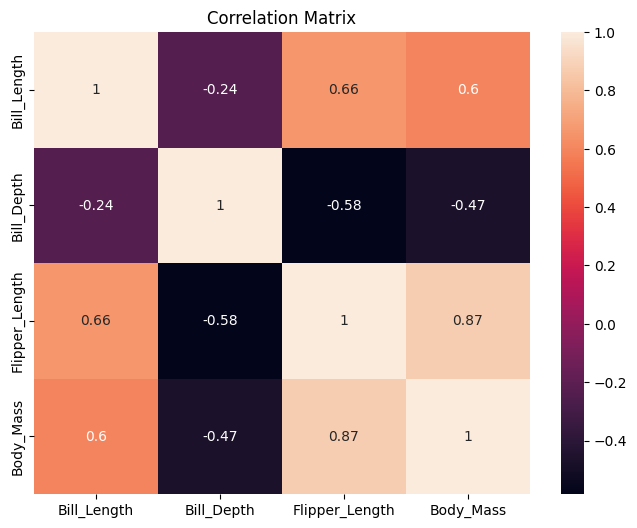

In [169]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Bill_Length','Bill_Depth','Flipper_Length','Body_Mass']].corr(), annot=True)
plt.title("Correlation Matrix")

plt.show()

- We can see that Bill_Length & Flipper_Length, Bill_Length & Body_Mass are positively correlated.
- Flipper_Length & Body_Mass are highly correlated.
- There is no correlation between Bill_Length & Bill_Depth.

# Summary:
- Bill_Length is an important parameter to distinguish the Species.
- On the basis of relation between Bill_Length & Bill_Depth or Bill_Length & Flipper_Length or Bill_Length & Body_Mass, We can differentiate the penguins.
- The number of penguins has increased from the year 2007 to 2009.
- Male Penguins have higher Bill_Length,Bill_Depth,Flipper_Length and Body_Mass as compared to Female penguins of a species.
- Chinstrap penguins have maximum Bill_Length.
- 'Adelie' and 'Chinstrap' penguins have deeper Bill_Depth.
- 'Gentoo' penguins have longest Flipper_Length.
- 'Gentoo' penguins have maximum Body_Mass.
- 'Adelie' penguins are present in all islands.
- 'Gentoo' penguins are present in 'Biscoe' island only.
- 'Chinstrap' penguins are present in 'Dream' island only.
- 'Torgersen' island has 'Adelie' penguins.

                                            ## THANK YOU! ##